### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

In [44]:
tf.__version__

'2.0.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [47]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY_cat=tf.keras.utils.to_categorical(trainY,num_classes=None,dtype='float32')
testY_cat=tf.keras.utils.to_categorical(testY,num_classes=None,dtype='float32')

In [0]:
trainX =np.array(trainX).astype('float32')
testX =np.array(testX).astype('float32')

In [50]:
print(trainY_cat.shape)
print('First 5 examples now are: ', trainY_cat[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [51]:
trainX.shape

(60000, 28, 28)

In [52]:
testX.shape

(10000, 28, 28)

In [0]:
trainX = trainX / 255.0

testX = testX / 255.0

### Visualize the data

Plot first 10 images in the triaining set and their labels.

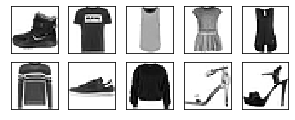

label for each of the above image:
[9 0 0 3 0 2 7 2 5 5]


In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    
plt.show()
print ("label for each of the above image:")
print(trainY[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(784,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [57]:
model1.fit(trainX, trainY_cat, validation_data=(testX, testY_cat), epochs=50 ,batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/sample - loss: 2.4056 - accuracy: 0.0959 - val_loss: 2.3507 - val_accuracy: 0.1083
Epoch 2/50
60000/60000 [==============================] - 2s 27us/sample - loss: 2.3528 - accuracy: 0.1091 - val_loss: 2.3049 - val_accuracy: 0.1241
Epoch 3/50
60000/60000 [==============================] - 2s 27us/sample - loss: 2.3070 - accuracy: 0.1256 - val_loss: 2.2643 - val_accuracy: 0.1464
Epoch 4/50
60000/60000 [==============================] - 2s 27us/sample - loss: 2.2663 - accuracy: 0.1459 - val_loss: 2.2277 - val_accuracy: 0.1739
Epoch 5/50
60000/60000 [==============================] - 2s 27us/sample - loss: 2.2296 - accuracy: 0.1735 - val_loss: 2.1941 - val_accuracy: 0.2063
Epoch 6/50
60000/60000 [==============================] - 2s 27us/sample - loss: 2.1959 - accuracy: 0.2047 - val_loss: 2.1631 - val_accuracy: 0.2365
Epoch 7/50
60000/60000 [==============================] 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(784,activation=tf.nn.relu),
                              tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model

In [60]:
model2.fit(trainX, trainY_cat, validation_data=(testX, testY_cat), epochs=50,batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/sample - loss: 2.5265 - accuracy: 0.1576 - val_loss: 2.1715 - val_accuracy: 0.1280
Epoch 2/50
60000/60000 [==============================] - 2s 35us/sample - loss: 1.8819 - accuracy: 0.3538 - val_loss: 2.0763 - val_accuracy: 0.2147
Epoch 3/50
60000/60000 [==============================] - 2s 34us/sample - loss: 1.5474 - accuracy: 0.4738 - val_loss: 2.0136 - val_accuracy: 0.2692
Epoch 4/50
60000/60000 [==============================] - 2s 34us/sample - loss: 1.3553 - accuracy: 0.5380 - val_loss: 1.9681 - val_accuracy: 0.3203
Epoch 5/50
60000/60000 [==============================] - 2s 34us/sample - loss: 1.2300 - accuracy: 0.5772 - val_loss: 1.9327 - val_accuracy: 0.3604
Epoch 6/50
60000/60000 [==============================] - 2s 34us/sample - loss: 1.1411 - accuracy: 0.6076 - val_loss: 1.9039 - val_accuracy: 0.3952
Epoch 7/50
60000/60000 [==============================] 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
model3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(784,activation=tf.nn.relu),tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.001, momentum=0.9)

In [0]:
model3.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model3.fit(trainX, trainY_cat, validation_data=(testX, testY_cat), epochs=50 ,batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/sample - loss: 2.7946 - accuracy: 0.1133 - val_loss: 2.3365 - val_accuracy: 0.1198
Epoch 2/50
60000/60000 [==============================] - 2s 35us/sample - loss: 2.7171 - accuracy: 0.1270 - val_loss: 2.3081 - val_accuracy: 0.1324
Epoch 3/50
60000/60000 [==============================] - 2s 35us/sample - loss: 2.5769 - accuracy: 0.1562 - val_loss: 2.2695 - val_accuracy: 0.1510
Epoch 4/50
60000/60000 [==============================] - 2s 35us/sample - loss: 2.3930 - accuracy: 0.2025 - val_loss: 2.2237 - val_accuracy: 0.1810
Epoch 5/50
60000/60000 [==============================] - 2s 35us/sample - loss: 2.1869 - accuracy: 0.2670 - val_loss: 2.1734 - val_accuracy: 0.2283
Epoch 6/50
60000/60000 [==============================] - 2s 35us/sample - loss: 1.9793 - accuracy: 0.3348 - val_loss: 2.1211 - val_accuracy: 0.2964
Epoch 7/50
60000/60000 [==============================] 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(100,activation='sigmoid'),
                              tf.keras.layers.Dense(100,activation='sigmoid'),
                              tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
opt2 = SGD(lr=0.03, momentum=0.9)
model4.compile(optimizer = opt2,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
model4.fit(trainX, trainY_cat, validation_data=(testX, testY_cat), epochs=50 ,batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 18us/sample - loss: 2.4498 - accuracy: 0.0988 - val_loss: 2.5869 - val_accuracy: 0.1000
Epoch 2/50
60000/60000 [==============================] - 0s 7us/sample - loss: 2.1402 - accuracy: 0.2011 - val_loss: 2.5594 - val_accuracy: 0.1000
Epoch 3/50
60000/60000 [==============================] - 0s 7us/sample - loss: 1.7301 - accuracy: 0.3539 - val_loss: 2.5274 - val_accuracy: 0.1724
Epoch 4/50
60000/60000 [==============================] - 0s 8us/sample - loss: 1.3989 - accuracy: 0.5303 - val_loss: 2.4953 - val_accuracy: 0.1921
Epoch 5/50
60000/60000 [==============================] - 0s 7us/sample - loss: 1.1877 - accuracy: 0.6016 - val_loss: 2.4652 - val_accuracy: 0.1967
Epoch 6/50
60000/60000 [==============================] - 0s 8us/sample - loss: 1.0635 - accuracy: 0.6305 - val_loss: 2.4381 - val_accuracy: 0.1989
Epoch 7/50
60000/60000 [==============================] - 0s 

## Review model

In [68]:
test_loss, test_acc =model1.evaluate(testX, testY_cat, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.4298 - accuracy: 0.6407

Test accuracy: 0.6407


In [69]:
test_loss, test_acc =model2.evaluate(testX, testY_cat, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.4297 - accuracy: 0.6970

Test accuracy: 0.697


In [70]:
test_loss, test_acc =model3.evaluate(testX, testY_cat, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.3182 - accuracy: 0.6643

Test accuracy: 0.6643


In [71]:
test_loss, test_acc =model4.evaluate(testX, testY_cat, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 2.0581 - accuracy: 0.2649

Test accuracy: 0.2649


In [0]:
#From above we can infer that model2 is giving best accuracy .

### Run the model

In [0]:
#Its already covered in above step